##### Noy Parti and Yonat Chen

# HW2 - Machine Learning in Healthcare 336546        

## Theory Questions

1. Performance indicates how good is our model, that is why in most cases model performance is more important than model accuracy.
When the Data is imbalanced- (for instance-not representative enough) the accuracy might be misleading.
a specific example might be: a positive diagnosis of 5 people out of 300 that were tested. in this case, the accuracy would be very high and misleading. 

2. Using only two features VS using all the features 
pros: 
- easier to find the weights
- The calculations will be easier- more features requires more samples to avoid overfitting (which will affect the computing time of the algorithm)
-1D , 2D, 3D data can be visualized- more intuitive in compare to a list of many features 
Cons: 
-We can't be sure that the suggested features are the most important features- could lead to misleading results 
- The accuracy & the performance of 2 features is lower than the accuracy & performance of all the features 

3. We can assume that because the biopsies are very similar and that it is difficult to distinguish them from the human eye that the data is not linearly seperable, Thus we shall use nonlinear SVM to find the correct boundary line.

4. The differences between LR and Linear SW are: 
LR is a predictive analysis that describes data and explains the relationship between variables- it mostly returns the probability to be in a certain class.
However, SVM is an algorithm that creates a hyperplane or line(decision boundary) which separates data into classes.
there is one hyperparameter to tune - lambda (or C=1/lambda). This hyperparameter determines the trade off between the bias and the variance- for low value of lambda our model may be overfitted (high variance)- in this case the model memorizes instead of learning. 
for high values of lambda (high bias)- we might get an under-fitted model (due to a large punishment in case of misclassification). 

## Coding Assignment

In [1]:
#imports
import numpy as np
import pickle
import sys
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
mpl.style.use(['ggplot'])
# %matplotlib inline
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.pipeline import Pipeline
from turtledemo import forest
from sklearn.metrics import plot_confusion_matrix

from Hw2_Functions import test_train_table
from Hw2_Functions import data_hist
from Hw2_Functions import plt_2d_pca
from Hw2_Functions import statistics_calculate


### Q1
Loading the Data & preprocessing (removing nan values)- there aren't a lot of nan value compared to the data size, that is why we decided to remove rows containing 'nan' values using dropna()

In [2]:
# Q1
df_org = pd.read_csv('HW2_data.csv')
# preprocessing
tmpData = df_org
tmpData = tmpData.dropna()  # removing nan rows
T1D_dataset_clean = tmpData
T1D_dataset_clean.head() 


,Age,Gender,Increased Urination,Increased Thirst,Sudden Weight Loss,Weakness,Increased Hunger,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Hair Loss,Obesity,Diagnosis,Family History
0,45,Male,No,No,No,Yes,No,No,No,Yes,No,No,Yes,No,Yes,No,Negative,0
1,42,Male,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,Negative,0
2,45,Male,Yes,Yes,No,Yes,No,Yes,No,No,No,Yes,No,No,Yes,No,Positive,0
3,59,Female,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Positive,1
4,40,Female,Yes,Yes,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Positive,0


Now, we will change the DF values to Binary values: 

In [3]:
T1D_dataset_clean_bin = pd.DataFrame()
T1D_dataset_clean_bin = pd.get_dummies(data=T1D_dataset_clean, drop_first=True)
T1D_dataset_clean_bin.head()


,Age,Family History,Gender_Male,Increased Urination_Yes,Increased Thirst_Yes,Sudden Weight Loss_Yes,Weakness_Yes,Increased Hunger_Yes,Genital Thrush_Yes,Visual Blurring_Yes,Itching_Yes,Irritability_Yes,Delayed Healing_Yes,Partial Paresis_Yes,Muscle Stiffness_Yes,Hair Loss_Yes,Obesity_Yes,Diagnosis_Positive
0,45,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0
1,42,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,45,0,1,1,1,0,1,0,1,0,0,0,1,0,0,1,0,1
3,59,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,40,0,0,1,1,1,1,0,0,1,1,0,0,1,1,0,0,1


### Q2

First we created X and Y. We drop 'Diagnosis' column from X, because this is the lable we want to find, and put it in Y - our lable. Then we splited the data into train and test:

In [4]:
# Create Y and Drop Diagnosis from X:
X = T1D_dataset_clean_bin.drop('Diagnosis_Positive', axis=1)
y = T1D_dataset_clean_bin['Diagnosis_Positive']
# Create Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=10, stratify=y)


### Q3
#### section a:
We created a function "test_train_table" that compare the distribution of each feature between test and train:

In [5]:
# Comparisment between X_test and X_train- Creating Table 1
x_table_compare = test_train_table(X_train, X_test)
print(x_table_compare)

                         train %  test %
Family History                50      55
Gender_Male                   61      70
Increased Urination_Yes       50      46
Increased Thirst_Yes          46      38
Sudden Weight Loss_Yes        42      41
Weakness_Yes                  58      60
Increased Hunger_Yes          47      41
Genital Thrush_Yes            20      30
Visual Blurring_Yes           46      39
Itching_Yes                   50      45
Irritability_Yes              25      23
Delayed Healing_Yes           48      38
Partial Paresis_Yes           44      39
Muscle Stiffness_Yes          38      36
Hair Loss_Yes                 35      33
Obesity_Yes                   17      15


1. Imbalance of features between train and test may impair our learning, and may cause a poor predictive performance, specifically for the minority class. The main reason is that some features have different influence according to there label- (positive or negative). For example, we can see at section b, that when "partial paresis" is positive (label "Yes") there is a big difference between the numbers of positive and negative patients, and there are many positive patients.  On the other hand, when "partial paresis" is negative (label "No"), the numbers of positive and negative patients are close, and it has less influence. If this feature was imbalance between train and test, and most of the "Yes" labels were in the train, it would get higher influence and will affect the test although the label is "No". in the same way, if most of the "No" labels were in the train, we would think that the feature has lower influence then it has, and won't take it under account in the test. 

2. We can solve the imbalanced issue by resample with different ratios or collecting more data that might balance the data.


#### section b:
In order to see plots that show the relationship between feature and label, we created the function "data_hist". Before useing it we make sure all the columns output are 'Yes' and 'No', and changed to this outputs in the column 'Family History'. 

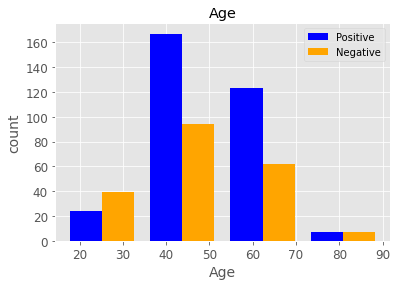

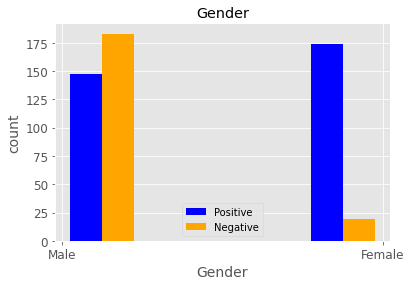

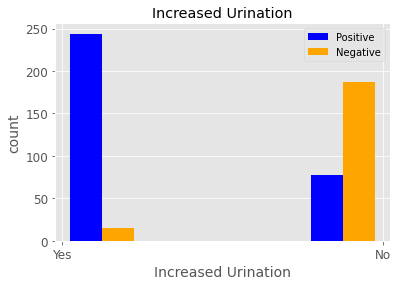

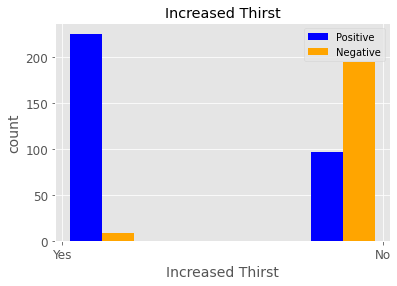

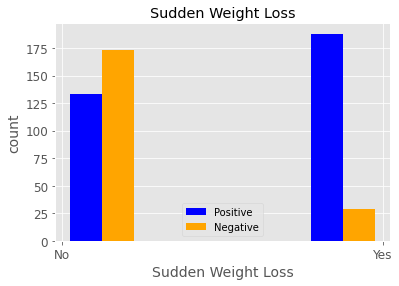

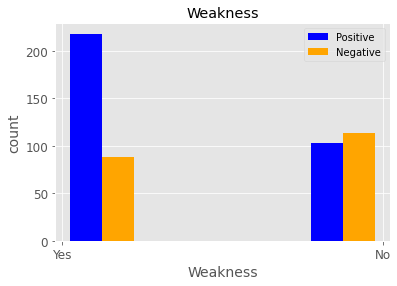

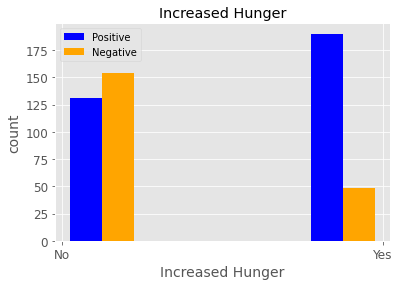

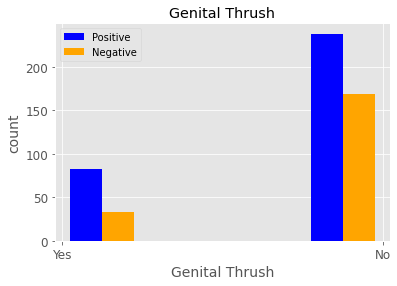

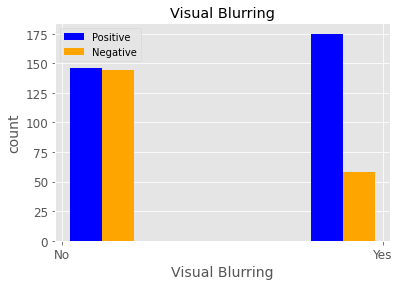

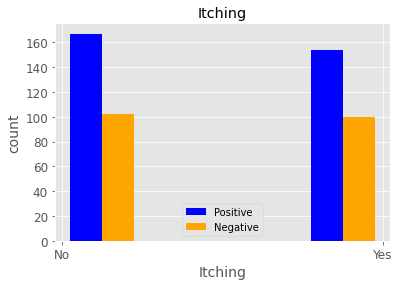

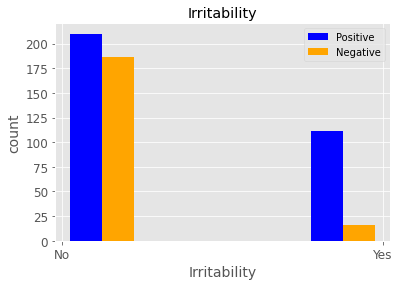

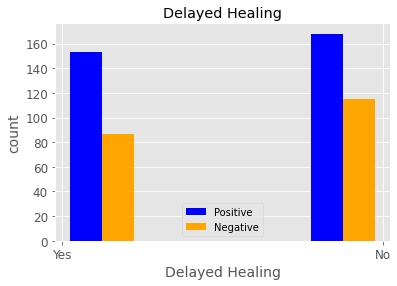

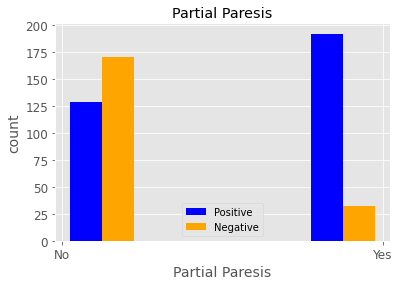

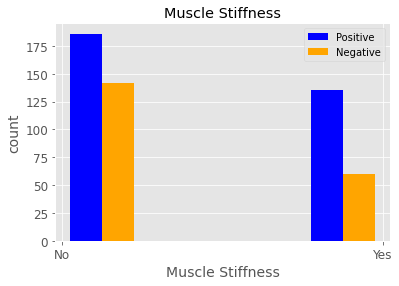

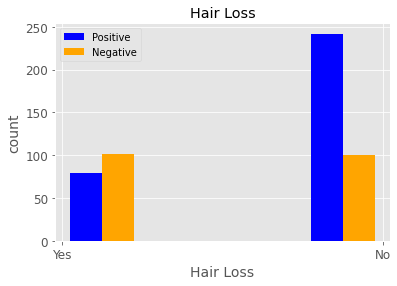

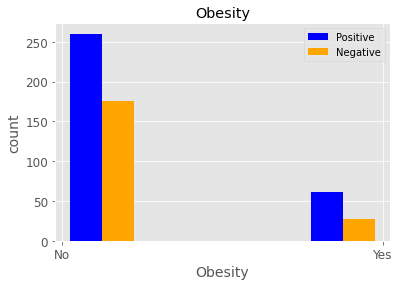

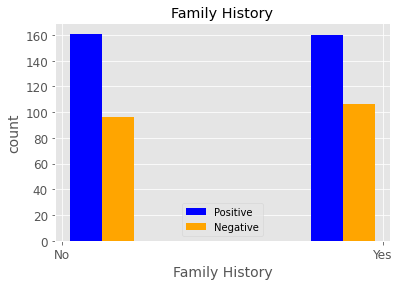

In [6]:
# Plots that describe the data:
# Preparation: change 'Family History' to string:
tmpData_str = tmpData.replace({'Family History': 0}, 'No')
tmpData_str = tmpData_str.replace({'Family History': 1}, 'Yes')
# Creating Figure 1- showing the relationship between features and labels
Hist = data_hist(tmpData_str)

#### section c:
Another plot that we wanted to show is the division of the lables among all the patients.Therefore we checked the 'Diagnosis' column:

Diagnosis division:


<AxesSubplot:ylabel='Diagnosis'>

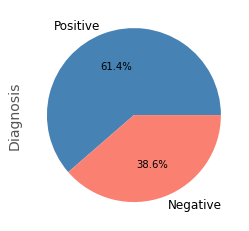

In [7]:
print('Diagnosis division:')
diagnosicData = T1D_dataset_clean.iloc[:, 16]
diagnosicData.value_counts().plot(kind="pie", colors=['steelblue', 'salmon'], autopct='%1.1f%%')

#### section d:
1. Those results are unexpected. First of all, although type 1 diabetes can appear at any age, it appears at mainly in children between 4 and 7 years old, and in children between 10 and 14 years old. However, in our dataset, those ages don't appear at all, and the diabetes occurs mainly in 40-50 and 60-70. In addition, the exact cause of T1D is still unknown, but there are some known risk factors for type 1 diabetes, one of them is Family history. However in the data exploration it seems that it not so influence the results. In the other features we can see symptoms that characterize diabetes like: increased Urination, Increased Thirst, weakness. When we look at those histogram we see that many patients who suffering from them, have diabetes. other features like Sudden Weight Loss and Partial Paresis also that characterize diabetes but there are no majority suffers from the disease among the patients who suffering from them. It is not surprising because there are other reasons to suffer from these symptoms.

2. We belive that the features: Increased Urination, Increased Thirst will be ill be particularly important to your model. This is because in section a we can see a big differnce between the number of patients which defined "positive" and the number of patients which defined "negative", when the feature was exist ("Yes") and was not exist ("No"). That means, that those features (and their existence) have bigger influance on the patients' lable. After them, we think the next important features will be: Gender, Age, Sudden Weight Lossand Partial Paresis. when looking at those feature histogram, we can see that there is a big differnce between the number of patients which defined "positive" and the number of patients which defined "negative", when the feature are exist ("Yes"). But there small differnce when the feautre was not exist ("No"). (at Age - there is a big difference in specific ages, and smaller in others) Therefore it is more inpluance from other features, but less influence from the first 2.
. 

### Q4
When we made our DF binary we used Pd for_dummies function, in this case (only two options for each column) we created one hot vectors - the answer is in Q1 
"T1D_dataset_clean_bin = pd.get_dummies(data=T1D_dataset_clean, drop_first=True)" 
here is another way to do that by using one hot Encoder:

In [8]:
# Q4:
encoder = OneHotEncoder(sparse=False,handle_unknown='ignore')
hot_vector = encoder.fit_transform(X)
print(hot_vector)

[[0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 1. 1. 0.]
 ...
 [0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


### Q5
#### section a:
Train one linear model and one non-limear model (the best parameters are printed in the end):

In [9]:
# Q5.a:
# Split the training set into Train and Validation:
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, random_state=10, shuffle=True)
C = np.array([0.001, 0.01, 1, 10, 100, 1000])
max_iter = 2000

# Linear model:
# Logistic Regression:
pen = ['l1', 'l2']
solver = 'saga'

from sklearn.model_selection import GridSearchCV
log_reg = LogisticRegression(random_state=5, max_iter=max_iter, solver=solver)
C = np.array([0.01, 0.01, 1, 10, 100, 1000])
pipe = Pipeline(steps=[('scale', StandardScaler()), ('logistic', log_reg)])
lin_log_reg = GridSearchCV(estimator=pipe, param_grid={'logistic__C': 1/C, 'logistic__penalty': pen},
                           scoring=['roc_auc'], cv=skf, refit='roc_auc', verbose=3, return_train_score=True)
lin_log_reg.fit(X_train, Y_train)
best_lin_log_reg = lin_log_reg.best_estimator_

#Y:
best_lin_log_reg.fit(X_train, Y_train)

y_pred_proba_train_lin=best_lin_log_reg.predict_proba(X_train)
y_pred_train_lin=best_lin_log_reg.predict(X_train)
y_pred_proba_test_lin = best_lin_log_reg.predict_proba(X_test)
y_pred_test_lin = best_lin_log_reg.predict(X_test)

# Non-Linear model:
# SVM:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc = SVC(probability=True)
C2 = np.array([1, 100, 1000])#, 10, 100, 1000])

pipe = Pipeline(steps=[('scale', StandardScaler()), ('svm', svc)])
svm_nonlin = GridSearchCV(estimator=pipe, param_grid={'svm__C': C2, 'svm__kernel': ['rbf', 'poly'], 'svm__gamma': ['auto', 'scale']},
                          scoring=['roc_auc'], cv=skf, refit='roc_auc', verbose=3, return_train_score=True)
svm_nonlin.fit(X_train, Y_train)
best_svm_nonlin = svm_nonlin.best_estimator_

#Y
best_svm_nonlin.fit(X_train, Y_train)
y_pred_proba_train_nonlin = best_svm_nonlin.predict_proba(X_train)
y_pred_train_nonlin = best_svm_nonlin.predict(X_train)
y_pred_proba_test_nonlin = best_svm_nonlin.predict_proba(X_test)
y_pred_test_nonlin = best_svm_nonlin.predict(X_test)

#Print Best Parameters
print('Best parameters for linear model logistic regression:')
print(lin_log_reg.best_params_)
print('Best parameters for non-linear model SVM:')
print(svm_nonlin.best_params_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END logistic__C=100.0, logistic__penalty=l1; roc_auc: (train=0.987, test=0.977) total time=   0.0s
[CV 2/5] END logistic__C=100.0, logistic__penalty=l1; roc_auc: (train=0.990, test=0.965) total time=   0.0s
[CV 3/5] END logistic__C=100.0, logistic__penalty=l1; roc_auc: (train=0.991, test=0.944) total time=   0.0s
[CV 4/5] END logistic__C=100.0, logistic__penalty=l1; roc_auc: (train=0.984, test=0.980) total time=   0.0s
[CV 5/5] END logistic__C=100.0, logistic__penalty=l1; roc_auc: (train=0.985, test=0.988) total time=   0.0s
[CV 1/5] END logistic__C=100.0, logistic__penalty=l2; roc_auc: (train=0.987, test=0.977) total time=   0.0s
[CV 2/5] END logistic__C=100.0, logistic__penalty=l2; roc_auc: (train=0.990, test=0.965) total time=   0.0s
[CV 3/5] END logistic__C=100.0, logistic__penalty=l2; roc_auc: (train=0.991, test=0.944) total time=   0.0s
[CV 4/5] END logistic__C=100.0, logistic__penalty=l2; roc_auc: (train=0.984

#### section b:
The appropriate evaluation metrics of the train and test sets are:

For linear model the evaluation metrics are:
train AUROC is 0.986
train Accuracy is 0.926
train F1 is 0.939
train Loss is 0.152
test AUROC is 0.957
test Accuracy is 0.905
test F1 is 0.921
test Loss is 0.252
confusion matrix on linear test set:


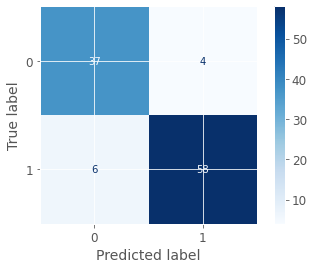

For non-linear model the evaluation metrics are:
train AUROC is 1.000
train Accuracy is 0.995
train F1 is 0.996
train Loss is 0.009
test AUROC is 0.990
test Accuracy is 0.924
test F1 is 0.933
test Loss is 0.191
confusion matrix on non-linear test set:


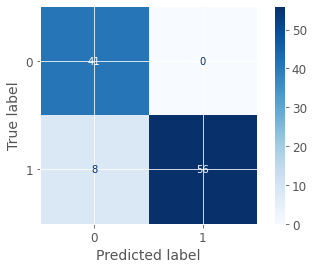

In [10]:
# Q5.b:

# Linear Classifier Parameters:
# loss:
loss_lin_test = log_loss(Y_test, y_pred_proba_test_lin)
loss_lin_train = log_loss(Y_train, y_pred_proba_train_lin)


# Train
[Acc, F1, Auc] = statistics_calculate(Y_train, y_pred_train_lin, y_pred_proba_train_lin)
print("For linear model the evaluation metrics are:")
print(f'train AUROC is {Auc:.3f}')
print(f'train Accuracy is {Acc:.3f}')
print(f'train F1 is {F1:.3f}')
print(f'train Loss is {loss_lin_train:.3f}')


# Test
[Acc, F1, Auc] = statistics_calculate(Y_test, y_pred_test_lin, y_pred_proba_test_lin)
print(f'test AUROC is {Auc:.3f}')
print(f'test Accuracy is {Acc:.3f}')
print(f'test F1 is {F1:.3f}')
print(f'test Loss is {loss_lin_test:.3f}')

print("confusion matrix on linear test set:")
plot_confusion_matrix(best_lin_log_reg, X_test, Y_test, cmap=plt.cm.Blues)
plt.show()

# NonLinear Classifier Parameters:
# loss:
from sklearn.metrics import hinge_loss
#best_svm_nonlin.fit(X_train,Y_train)

#Y for loss calculate:
y_pred_train_nonlin_loss = best_svm_nonlin.decision_function(X_train)
y_pred_test_nonlin_loss = best_svm_nonlin.decision_function(X_test)

# loss:
loss_nonlin_train = hinge_loss(Y_train, y_pred_train_nonlin_loss)
loss_nonlin_test = hinge_loss(Y_test, y_pred_test_nonlin_loss)

# Train
[Acc, F1, Auc] = statistics_calculate(Y_train, y_pred_train_nonlin, y_pred_proba_train_nonlin)
print("For non-linear model the evaluation metrics are:")
print(f'train AUROC is {Auc:.3f}')
print(f'train Accuracy is {Acc:.3f}')
print(f'train F1 is {F1:.3f}')
print(f'train Loss is {loss_nonlin_train:.3f}')


# Test
[Acc, F1, Auc] = statistics_calculate(Y_test, y_pred_test_nonlin, y_pred_proba_test_nonlin)
print(f'test AUROC is {Auc:.3f}')
print(f'test Accuracy is {Acc:.3f}')
print(f'test F1 is {F1:.3f}')
print(f'test Loss is {loss_nonlin_test:.3f}')

print("confusion matrix on non-linear test set:")
plot_confusion_matrix(best_svm_nonlin, X_test, Y_test, cmap=plt.cm.Blues)
plt.show()

#### section c:
In both case linear and non-linear the performs were pretty close. However, the statistics of the non-linear model are better: AUROC, Accuracy and F1 are higher for both sets: train and test, and the loss is lower in both sets: train and test. Therefore non-linear model is better.

### Q6 - Feature Selection

#### section a:

<Figure size 1008x720 with 0 Axes>

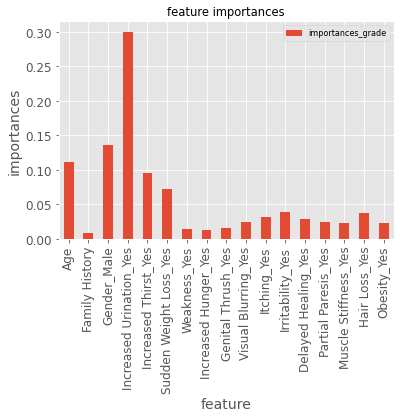

2 most important features according to random forest are: Increased Urination_Yes and Gender_Male


In [11]:
# Q6: Random Forest
indicesNames = []

from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib

# make a list of features names
names = list(X_train.columns)
# Random Forest
rd_clf = rfc(n_estimators=10)
rd_clf.fit(X_train, Y_train)

# arrange the features
importances_tmp = rd_clf.feature_importances_
indices = np.argsort(importances_tmp)[::-1] 

# arrange thr features names
for index in indices:
    indicesNames.append(names[index])

# figure:
plt.figure(figsize=(14, 10))
matplotlib.rcParams.update({'font.size': 8})

importances = pd.DataFrame({'importances_grade': rd_clf.feature_importances_})
ax =importances.plot(kind='bar')
ax.set_title('feature importances')
ax.set_xlabel('feature')
ax.set_ylabel('importances')
ax.set_xticklabels(names)
plt.show()

print(f'2 most important features according to random forest are: {names[indices[0]]} and {names[indices[1]]}')



1. Printed by the code.
2. The features rating is pretty match up with the feature exploration we did. We can see that features with the highest rating: Increased Urination and Increased Thirst, showed a big differnce between the number of patients which defined "positive" and the number of patients which defined "negative", when the feature was exist ("Yes") and was not exist ("No"). That means, that those features have bigger influance on the patients' lable, and therfore match to the histogram in 6a.
After those 2 features, the next important feature are: Gender, Age, Sudden Weight Lossand Partial Paresis. when looking in the feature exploration we did, we can see that there is a big differnce between the number of patients which defined "positive" and the number of patients which defined "negative", when those features are exist ("Yes"). But there small differnce when the feautres are not exist ("No"). (at Age - there is a big difference in specific ages, and smaller in others). Therefore they are little more inpluance from other features, but less influence from the first 2.
The other features has smaller differnce between the number of patients which defined "positive" and the number of patients which defined "negative", when the feature was exist ("Yes") and was not exist ("No"), and also lower importance in the histogram of 6a.
Therfore, the features rating is  match up with the feature exploration we did.

### Q7.a
Here we performed dimensionality reduction on the dataset and plotted our results 

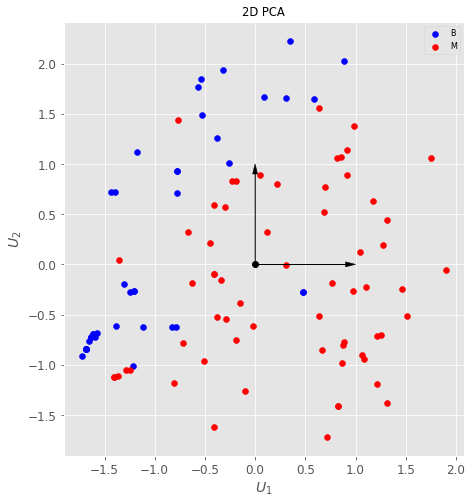

In [12]:
#C7.a
# scaling the data and fitting 
from sklearn.decomposition import PCA
n_components = 2 
pca=PCA(n_components=n_components, whiten = True)
scaler= StandardScaler()
X_train_org= X_train 
X_test_org= X_test 
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# apply PCA transformation
X_train_pca = pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)

#plotting 2D
plt_2d_pca(X_test_pca,Y_test)



### Q7.b

We can distinguish between the two labels, however, the separation is not straightforward. 

### Q7.c
Now we will train the same models on the dimensionality-reduced training set

The score on the test set with PCA preprocessing is 0.82
test AUROC for LR is 0.918
test Accuracy for LR is 0.819
test F1 for LR is 0.843
confusion matrix on linear PCA test set:


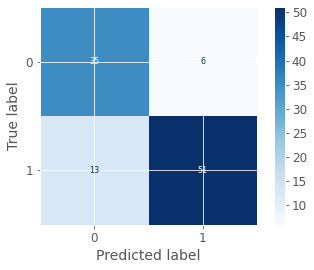

In [13]:
#C7.c
#Training the models
#------- Linear-------#
pipe_pca = Pipeline(steps=[('scale', StandardScaler()),('pca', pca), ('logistic', best_lin_log_reg)])
pipe_pca.fit(X_train, Y_train)
print('The score on the test set with PCA preprocessing is {:.2f}'.format(pipe_pca.score(X_test,Y_test)))

y_pred_lin_pca=pipe_pca.predict(X_test)
y_pred_proba_pca=pipe_pca.predict_proba(X_test)

[Acc, F1, Auc] = statistics_calculate(Y_test ,y_pred_lin_pca,y_pred_proba_pca)
print(f'test AUROC for LR is {Auc:.3f}')
print(f'test Accuracy for LR is {Acc:.3f}')
print(f'test F1 for LR is {F1:.3f}')

print("confusion matrix on linear PCA test set:")
plot_confusion_matrix(pipe_pca, X_test, Y_test, cmap=plt.cm.Blues)
plt.show()

The score on the test set with PCA preprocessing is 0.88
test AUROC is 0.933
test Accuracy is 0.876
test F1 is 0.898
confusion matrix on non-linear PCA SVM test set:


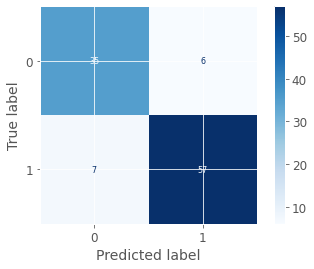

In [14]:
#C7.c
#Training the models
#------- SVM-------#

pipe_pca_svm = Pipeline(steps=[('scale', StandardScaler()),('pca', pca), ('svm', best_svm_nonlin)])
pipe_pca_svm.fit(X_train, Y_train)
print('The score on the test set with PCA preprocessing is {:.2f}'.format(pipe_pca_svm.score(X_test,Y_test)))

y_pred_svm_pca=pipe_pca_svm.predict(X_test)
y_pred_svm_proba_pca= pipe_pca_svm.predict_proba(X_test)
[Acc, F1, Auc] = statistics_calculate(Y_test ,y_pred_svm_pca,y_pred_svm_proba_pca)
print(f'test AUROC is {Auc:.3f}')
print(f'test Accuracy is {Acc:.3f}')
print(f'test F1 is {F1:.3f}')

print("confusion matrix on non-linear PCA SVM test set:")
plot_confusion_matrix(pipe_pca_svm, X_test, Y_test, cmap=plt.cm.Blues)
plt.show()


### Q7.d
Now we will train the same models on the best two features from section 6 ('Increased Thirst_Yes', 'Increased Urination_Yes')

test AUROC for LR- 2 features is 0.859
test Accuracy for LR- 2 features is 0.819
test F1 for LR- 2 features is 0.840
confusion matrix on linear 2 features test set:


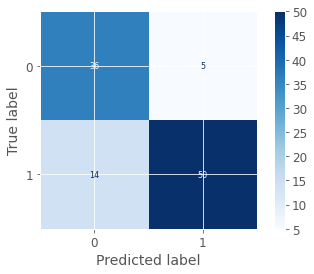

In [15]:
#C7.d
# Now we train the models on the best two features from section 6
#------- Linear-------#

best_cols= ['Increased Thirst_Yes', 'Increased Urination_Yes']
X_train_two_feat = X_train_org[best_cols]
X_test_two_feat = X_test_org[best_cols]

X_train_two_feat=scaler.fit_transform(X_train_two_feat)
X_test_two_feat=scaler.transform(X_test_two_feat)

best_lin_log_reg.fit(X_train_two_feat, Y_train)
y_pred_best_feat_lin=best_lin_log_reg.predict(X_test_two_feat)
y_pred_best_feat_lin_proba= best_lin_log_reg.predict_proba(X_test_two_feat)
[Acc, F1, Auc] = statistics_calculate(Y_test ,y_pred_best_feat_lin,y_pred_best_feat_lin_proba)
print(f'test AUROC for LR- 2 features is {Auc:.3f}')
print(f'test Accuracy for LR- 2 features is {Acc:.3f}')
print(f'test F1 for LR- 2 features is {F1:.3f}')

print("confusion matrix on linear 2 features test set:")
plot_confusion_matrix(best_lin_log_reg, X_test_two_feat, Y_test, cmap=plt.cm.Blues)
plt.show()


test AUROC for SVM- 2 features is: 0.834
test Accuracy for SVM- 2 features is 0.819
test F1 for SVM- 2 features is 0.840
confusion matrix on non-linear SVM 2 features test set:


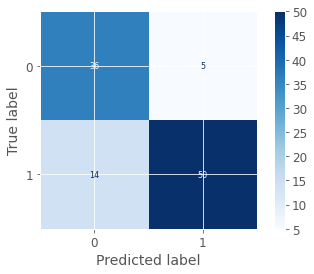

In [16]:
#C7.d
# Now we train the models on the best two features from section 6

#------- SVM-------#
best_svm_nonlin.fit(X_train_two_feat,Y_train)
y_pred_best_feat_svm=best_svm_nonlin.predict(X_test_two_feat)
y_pred_best_feat_svm_proba= best_svm_nonlin.predict_proba(X_test_two_feat)
[Acc, F1, Auc] = statistics_calculate(Y_test ,y_pred_best_feat_svm,y_pred_best_feat_svm_proba)
print(f'test AUROC for SVM- 2 features is: {Auc:.3f}')
print(f'test Accuracy for SVM- 2 features is {Acc:.3f}')
print(f'test F1 for SVM- 2 features is {F1:.3f}')

print("confusion matrix on non-linear SVM 2 features test set:")
plot_confusion_matrix(best_svm_nonlin, X_test_two_feat, Y_test, cmap=plt.cm.Blues)
plt.show()


### Q7.e 
The linear regression model performs better for the dimension reduced dataset
The non linear SVM model performs better as well for the dimension reduced dataset
it does make sense that the PCA algorithm will show better performance- even if the two selected features are the most important, they are not 
the only features that affects the diagnosis.

*It is important to say that PCA is desinged for continuous variables, and not to binary data. 
